# Import Libraries

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Vieving the Dataset

In [6]:
df_male = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/Datasets/ANSUR II MALE Public.csv",encoding='latin-1')

df_female = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/Datasets/ANSUR II FEMALE Public.csv",encoding='latin-1')

df = pd.concat([df_male, df_female])

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
dropped = ['subjectid', 
           'SubjectNumericRace', 
           'Ethnicity', 'Heightin', 
           'Weightlbs', 'Date', 
           'Installation', 'Component', 
           'Branch', 'PrimaryMOS', 
           'SubjectId']

In [9]:
df.drop(dropped , axis = 1 ,inplace = True)

In [10]:
df.shape

(6068, 98)

## Dedecting Missing Values

In [11]:
df.isna().sum().sum()

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.0,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.0,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.0,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.0,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.0,1302.0,1349.00,1553.0
...,...,...,...,...,...,...,...,...
weightkg,6068.0,797.093935,156.528164,358.0,682.0,785.0,896.00,1442.0
wristcircumference,6068.0,169.002966,13.124513,124.0,159.0,170.0,179.00,216.0
wristheight,6068.0,830.059987,47.650519,672.0,797.0,830.0,863.00,1009.0
DODRace,6068.0,1.615030,0.979156,1.0,1.0,1.0,2.00,8.0


## Outlier Dedection

In [13]:
df.shape

(6068, 98)

In [14]:
def outlier_deleter(df,whisker):
  for col in df.drop('DODRace' , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      df.drop(outlier_indexes , axis = 0 , inplace = True)
      print(f'Total outlier {len(outlier_indexes)} in {col} column and dropped.')

In [15]:
# outlier_deleter(df,1.5)

In [16]:
df.shape

(6068, 98)

In [17]:
df.reset_index(drop=True, inplace=True)

# Looking the Target Variable

In [18]:
df['DODRace'].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [19]:
df.drop(df[df['DODRace'] > 3].index, axis = 0, inplace=True) # We should drop some classes because there is less than 500 data. Model could'nt predict well them.

In [20]:
df.reset_index(inplace=True, drop=True)

In [21]:
df.corr()['DODRace'].drop('DODRace').sort_values()

sittingheight           -0.324329
eyeheightsitting        -0.319669
wristheight             -0.267874
stature                 -0.232736
elbowrestheight         -0.227899
                           ...   
bizygomaticbreadth       0.032559
thighcircumference       0.032906
bitragionchinarc         0.083263
heelbreadth              0.166804
interpupillarybreadth    0.194548
Name: DODRace, Length: 94, dtype: float64

In [22]:
abs(df.corr()['DODRace'].drop('DODRace')).sort_values(ascending=False).head(10)

sittingheight             0.324329
eyeheightsitting          0.319669
wristheight               0.267874
stature                   0.232736
elbowrestheight           0.227899
lateralmalleolusheight    0.218440
acromialheight            0.217393
cervicaleheight           0.215708
waistbacklength           0.208262
axillaheight              0.205576
Name: DODRace, dtype: float64

In [23]:
df.drop(abs(df.corr()['DODRace'].drop('DODRace')).sort_values(ascending=False).head(10).index , axis = 1 , inplace = True)

In [24]:
df['DODRace'].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

# Creating X and y features

In [25]:
X = df.drop('DODRace',axis=1)
# X_ohe = pd.get_dummies(df.drop('DODRace',axis=1),drop_first=True) # This might be better.
y = df['DODRace']

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

enc = OrdinalEncoder()

cat = X.select_dtypes('object').columns

X[cat] = enc.fit_transform(X[cat])

oversample = SMOTE()

X, y_smote = oversample.fit_resample(X,y) 

## Handling Imbalanced Data

In [27]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X_ohe, y_smote = oversample.fit_resample(X_ohe, y)

# This is doing oversampling.

In [28]:
# from imblearn.combine import SMOTETomek

# smt = SMOTETomek(random_state=42)
# X_ohe, y = smt.fit_resample(X_ohe, y)

# It does both increment and decrement

In [29]:
# from imblearn.combine import SMOTEENN

# smt = SMOTEENN(random_state=42)
# X_ohe, y = smt.fit_resample(X_ohe, y)

## Train | Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_smote, test_size = 0.15, random_state=53)

## Scaling

In [31]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# #scaler = MinMaxScaler()
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
gb = GradientBoostingClassifier()

In [36]:
params = {'n_estimators' : [80,100,150,300,500,800,1000] , 'learning_rate' : [0.1 , 0.3 , 0.5 , 0.8 , 1 , 3] , 'max_depth' : [2,3,5,8,None] }

In [38]:
gb = GridSearchCV(gb , param_grid = params , scoring = 'accuracy' , n_jobs = -1 , verbose = 2 )

gb.fit(X_train , y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8, 1, 3],
                         'max_depth': [2, 3, 5, 8, None],
                         'n_estimators': [80, 100, 150, 300, 500, 800, 1000]},
             scoring='accuracy', verbose=2)

In [39]:
gb.best_score_

0.9545969930628484

In [40]:
gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.3, max_depth=8, n_estimators=1000)

In [41]:
gb.best_params_

{'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 1000}

In [43]:
gb = GradientBoostingClassifier(learning_rate = 0.3 , max_depth = 8 , n_estimators = 1000 ).fit(X_train , y_train)

# Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import cross_validate

In [45]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    plot_confusion_matrix(model, X_test, y_test)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test Set")
    print(classification_report(y_test, y_pred), end='\n')
    print("Train Set")
    print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test Set
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       585
           2       0.98      0.97      0.98       559
           3       0.95      0.98      0.96       563

    accuracy                           0.96      1707
   macro avg       0.97      0.97      0.96      1707
weighted avg       0.96      0.96      0.96      1707

Train Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3207
           2       1.00      1.00      1.00      3233
           3       1.00      1.00      1.00      3229

    accuracy                           1.00      9669
   macro avg       1.00      1.00      1.00      9669
weighted avg       1.00      1.00      1.00      9669



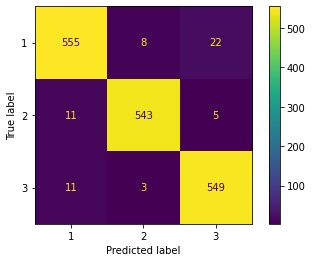

In [46]:
eval_metric(gb , X_train , y_train , X_test , y_test)

In [ ]:
gb = GradientBoostingClassifier(learning_rate = 0.3 , max_depth = 8 , n_estimators = 1000 ).fit(X_train , y_train)

cross_validate(gb , X_train , y_train , cv = 5 , scoring='accuracy')['test_score'].mean()

In [ ]:
# Done